In [1]:
from merra2_assistant.main import load_merra2_sample 
import yt 
import numpy as np

In [2]:
bbox_dict = {'altitude':[0, 68*1e3], 
             'latitude': [0., 50.],
             'longitude': [100., 150.]}
dsx0, ds_yt = load_merra2_sample(bbox_dict=bbox_dict, 
                                 virtual_alt_scale=50., 
                                 grid_resolution = (256,)*3)

yt : [INFO     ] 2024-05-01 11:11:50,083 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-05-01 11:11:50,084 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2024-05-01 11:11:50,084 Parameters: domain_left_edge          = [-8461935.  2047599.        0.]
yt : [INFO     ] 2024-05-01 11:11:50,084 Parameters: domain_right_edge         = [-711123. 9622557. 7485021.]
yt : [INFO     ] 2024-05-01 11:11:50,085 Parameters: cosmological_simulation   = 0


In [8]:
ds_yt.domain_width / ds_yt.domain_width[0]

unyt_array([1.        , 0.97731154, 0.96570798], '(dimensionless)')

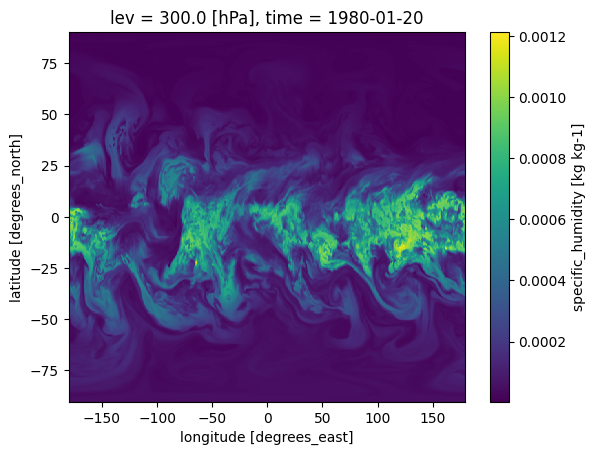

In [9]:
dsx0.QV.isel({'lev':20}).plot()

In [10]:
dsx0.lon[450]

<xarray.DataArray 'lon' ()> Size: 8B
array(101.25)
Coordinates:
    lon      float64 8B 101.2
    time     datetime64[ns] 8B 1980-01-20
Attributes:
    long_name:    longitude
    units:        degrees_east
    vmax:         1000000000000000.0
    vmin:         -1000000000000000.0
    valid_range:  [-1.e+15  1.e+15]

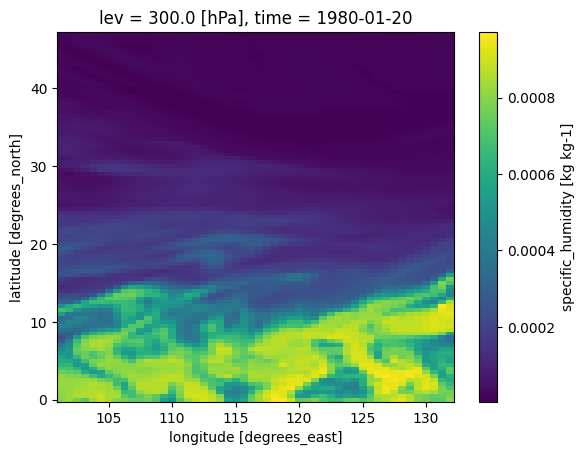

In [11]:
ds_sub = dsx0.isel({'lon':slice(450,500), 'lat':slice(180,275)})
ds_sub.isel({'lev':20}).QV.plot()

(42, 95, 50)


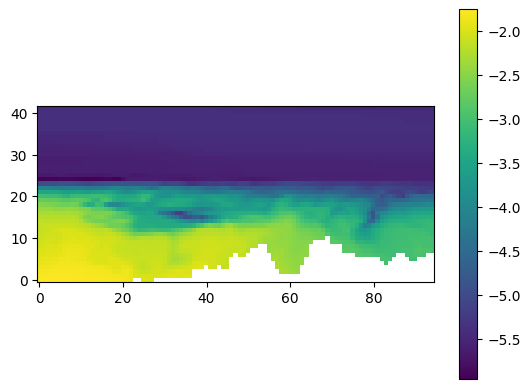

In [13]:
QV_m = ds_sub.QV.to_numpy()
H = ds_sub.H.to_numpy()
print(QV_m.shape)

import matplotlib.pyplot as plt 

plt.imshow(np.log10(QV_m[:,:,5]), origin='lower')
plt.colorbar()

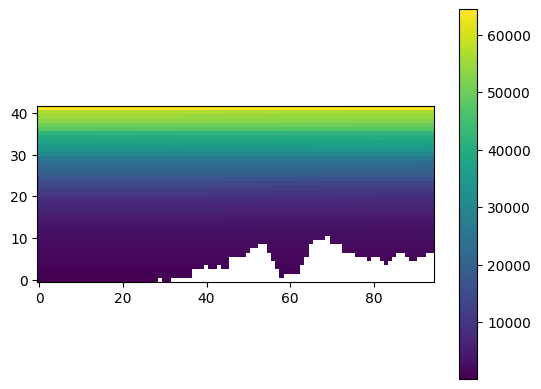

In [14]:
plt.imshow(H[:,:,5], origin='lower')
plt.colorbar()

yt : [INFO     ] 2024-05-01 11:15:27,011 xlim = 2047599.000000 9622557.000000
yt : [INFO     ] 2024-05-01 11:15:27,011 ylim = 0.000000 7485021.000000
yt : [INFO     ] 2024-05-01 11:15:27,013 xlim = 2047599.000000 9622557.000000
yt : [INFO     ] 2024-05-01 11:15:27,013 ylim = 0.000000 7485021.000000
yt : [INFO     ] 2024-05-01 11:15:27,014 Making a fixed resolution buffer of (('stream', 'QV')) 800 by 800



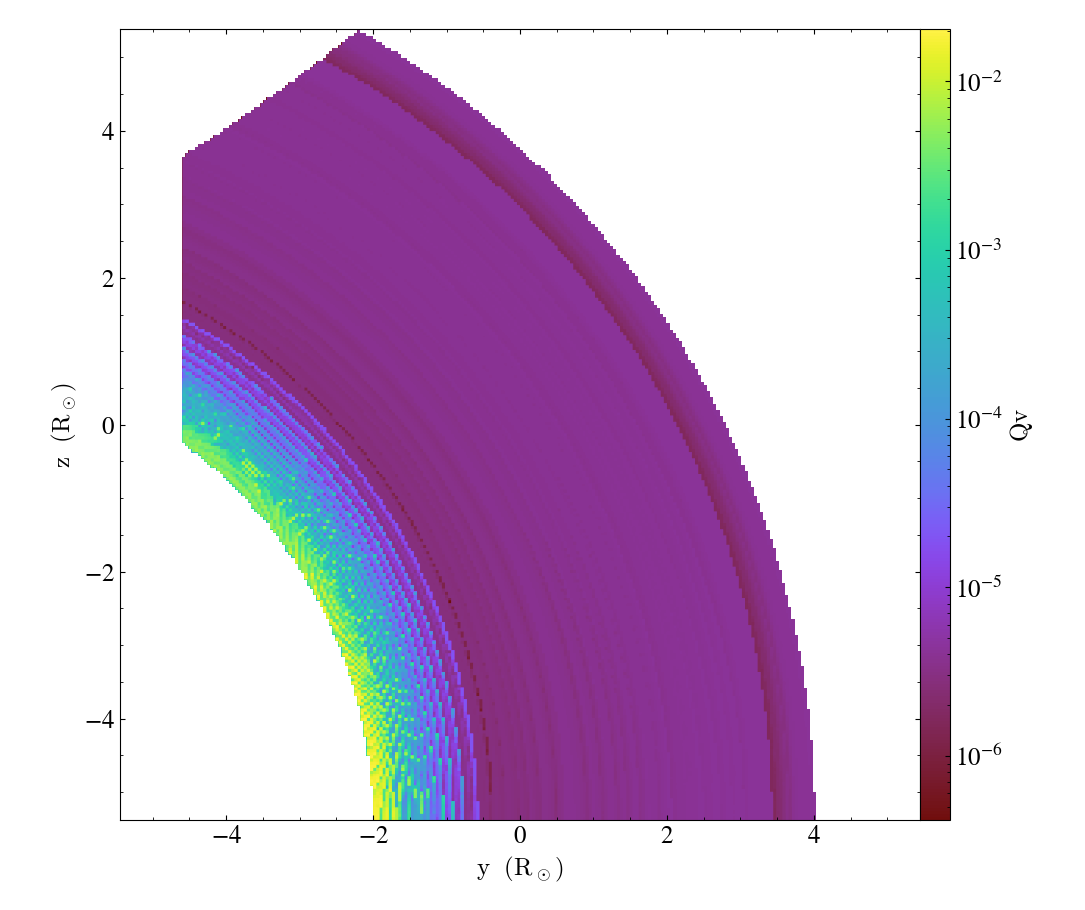

In [6]:
slc = yt.SlicePlot(ds_yt, 'x', 'QV')
# slc.set_log('dQV_n', False)
slc.show()

yt : [INFO     ] 2024-05-01 11:04:28,240 Rendering scene (Can take a while).
yt : [INFO     ] 2024-05-01 11:04:28,240 Creating volume


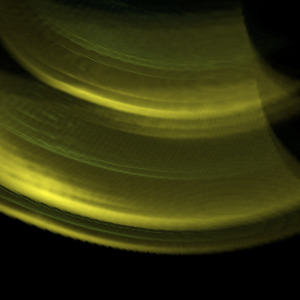

In [20]:
reg = ds_yt.region(ds_yt.domain_center, 
                   ds_yt.domain_left_edge, 
                   ds_yt.domain_right_edge)
sc = yt.create_scene(reg, field=('stream', 'dQV_n'))

cam = sc.add_camera(ds_yt)
cam.set_resolution((300,300))

# transfer function 
source = sc[0]
source.set_field(('stream', 'dQV_n'))
source.set_log(True)

bounds = (1e-3, 1)

# Since this rendering is done in log space, the transfer function needs
# to be specified in log space.
tf = yt.ColorTransferFunction(np.log10(bounds))
# tf.add_gaussian(-1, width=0.05, height=[0.753, 1.0, 0.933, 1.0])
tf.add_layers(10, colormap="cmyt.arbre")
source.tfh.tf = tf
source.tfh.bounds = bounds

# # adjust camera
cam.zoom(2)
# cam.yaw(-10*np.pi/180)
# cam.roll(220*np.pi/180)
# cam.rotate(100*np.pi/180)
# cam.set_resolution((300,300))

sc.show()

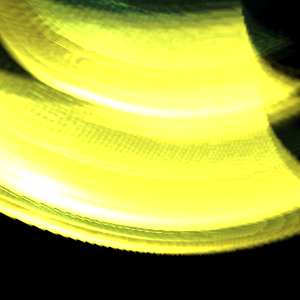

In [21]:
sc.show(sigma_clip=.1)